# Job Influence on Remote Work and Skill Set


In this project, provided by the TAIKAI.NETWORK platform and Landing.Jobs, it will be presented the steps taken in order to provide a new group of analyses that, in my opinion, where missing from the original report and that bring valuable insights to current and future workers of the IT Industry.

All Data from Landing.Jobs, Tech Careers Survey PT 2021

# 1. Data cleaning and export to CSV

The data provided by Landing.Jobs was originally in .XLSX format with 4 pages: Introduction, TCS PT 2021 - Raw Data, Data Dictionary and Metadata. So, in order to work with the data in Python, I needed to have available in "TCS PT 2021 - Raw Data" sheet in the CSV format.

Therefore, the following steps of data cleaning where needed:
1. Replace commas (',') with other appropriated signals in the data to prevent errors (8 columns affected)
    
    Affected Columns: REMOTE_WORKING_CURRENT, EMPLOYER_INDUSTRY, EMPLOYER_INDUSTRY_OTHER, EMPLOYER_ORG_TYPE_OTHER, LANGUAGE_LANGUAGES_OTHER, FRAMEWORK_FRAMEWORK_OTHER, SALARY_CHANGE, WAY_INTO_TECH_OTHER)


2. Export "TCS PT 2021 - Raw Data" to CSV (exporting only the active page in EXCEL) 


# 2. Create a new Python project and import libraries

After cleaning the data and exporting it to a CSV file, it was time to work in python.

The first step include:
- Import the libraries for data visualization;
- Import the dataset;

In [1]:
import missingno as msno #allows to see the available data visualy and to detect possible gaps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.read_csv('landing_jobs_data_csv.csv', encoding = 'latin-1')

After loading, I usually enjoy to visually see the data, giving me a better sense of possible gaps that may impact my future work.
And, as we can see bellow:
- In the left side, we can observe some missing values. Although not a deal breaker, it may lead to some answers being discarded during some analyses;
- In the middle, there's a great deal of data missing. However, this part of the dataset makes reference to the Languages and Frameworks that each interviewee knows, so it follows the expected distribution; 
- In the right, there's only a couple of answers missing. As stated before, although the magnitude of missing answers is lower than on the left side, it may lead to some answers being discarded and therefore, less answers in some analyses.

<AxesSubplot:>

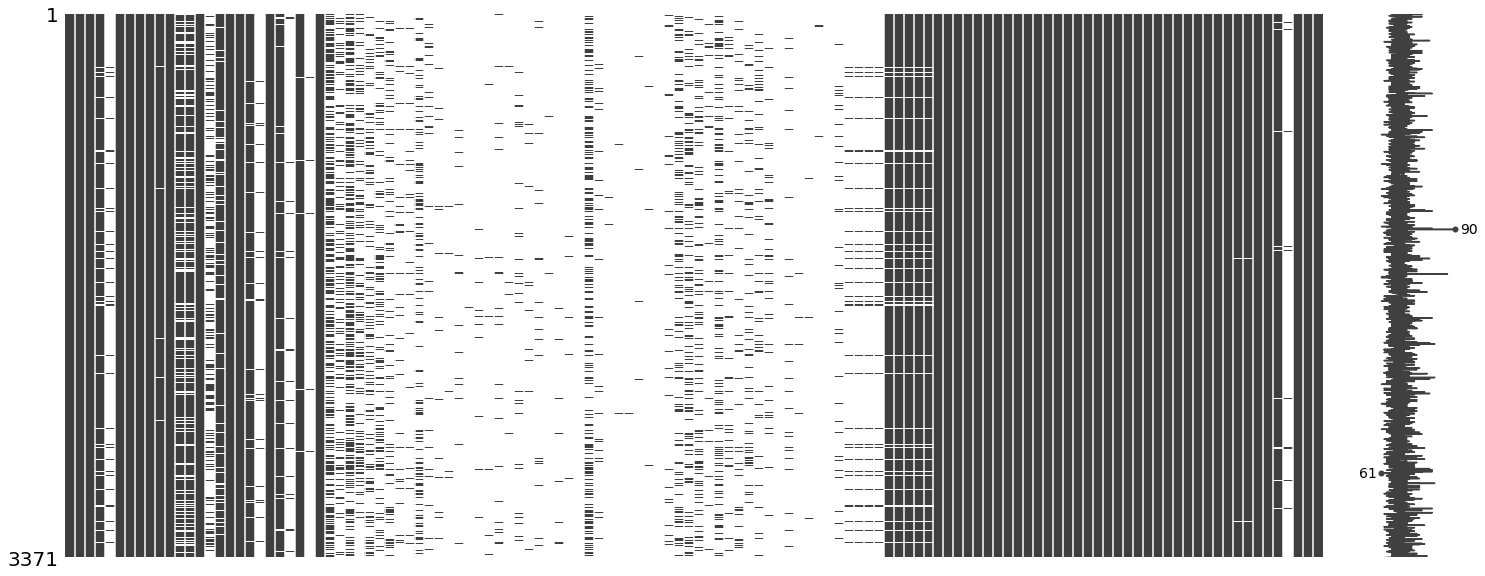

In [2]:
msno.matrix(results_df)

In order to understand the data available, it is useful to read the Data Dictionary made by the original authors. There, it is said that the column "Residency_Country" always has the same value (Portugal). So, in order to lower the amount of unnecessary data, it was decided to drop the column.

In [3]:
results_df.drop('Residence_Country', axis = 1, inplace = True)

After that, we can finally perform other initial analyses in other to get a sense of the data available

In [4]:
print(results_df.head()) #print the top 5 rows
print(results_df.columns.values.tolist()) #print the name of all the columns 
total_answers = results_df.ID.count() #count the total of answers available
print('Total answers available: ' + str(total_answers))

   ID                   Employment_Status Employment_Status_Aggregated  \
0   1                  Employed full-time           Permanent Employee   
1   2                  Employed full-time           Permanent Employee   
2   3  Working as a Contractor/Freelancer                   Contractor   
3   4                  Employed full-time           Permanent Employee   
4   5                  Employed full-time           Permanent Employee   

   Work_as_Contractor_12m  Work_as_Perm Residence_District  \
0                     1.0           NaN           Santarém   
1                     0.0           NaN            Coimbra   
2                     NaN           1.0              Porto   
3                     1.0           NaN             Açores   
4                     0.0           NaN              Braga   

  Residence_District_Aggregated Work_Company_Country Work_Company_Continent  \
0                        Centre             Portugal                 Europe   
1                       

# 3. Investigation Questions

As stated in the beginning of this notebook, the main drive of this project was to provide some insights to current and future workers of the IT Industry that, in my opinion, where missing in the original report.

So, I decided to investigate the following group of questions:
- A) What is the age distribution between genders?
- B) Does the type of Industry the people work with affect their opinion regarding remote work?
- C) What are the most common languages by each job role? And what Framework?

# A) What is the age distribution between genders?

In the Landing.Jobs report, slide 6, we are presented with two graphs: one for Gender Distribution; and another for Age Distribution. While this provides valuable information, the dominance of answers by male professionals makes it difficult to compare this distributions between genders.

So, in order to better undestand their distribution, we can use a boxplot graph.

Text(0.5, 1.0, 'Age Distribution by Gender')

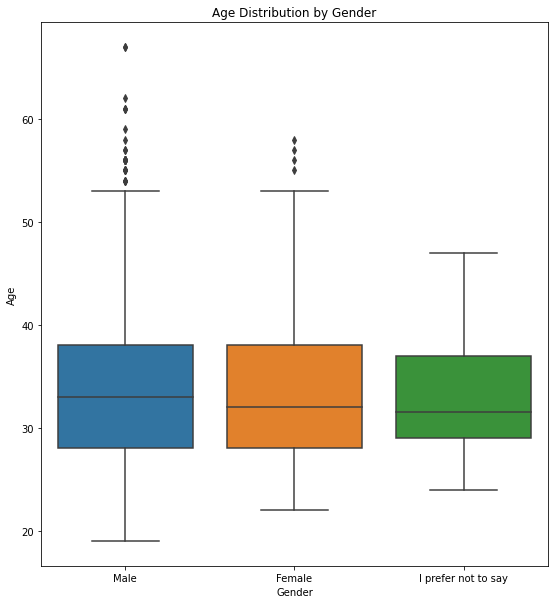

In [5]:
plt.figure(figsize = (20, 10))
g1 = plt.subplot(1, 2, 2)
sns.boxplot(data = results_df, x = 'Gender', y = 'Age')
g1.set_title('Age Distribution by Gender')

With this new graph, we can now infer that:

- <u>Male</u>: Being the category with the most amount of answers, it allows them to have youngest and oldest interviewee. However, is also the category with the most amount ofoutliers;
- <u>Female</u>: Despite having less answers than the 'Male'' category by a large marging (86% men vs 12% women), also registers some outliers;
- <u>Prefer not to say</u>: Although the category with the lowest amount of answers, we can observe that it has a similar distribution to the other two categories.

Additionally, we can infer from each boxplot that:
- All except the ‘Male’ category appear to have data with a positive skew (also known as right skewed);
- The median, represented by the line inside the box, seem to be different in all categories.

However, is the last phrase really correct? To prove it, we need to perform statistical analysis with an ANOVA test (provided bellow).
As we can observe, the P-Value we obtain when comparing all categories is superior to 0.05 and, therefore, we cannot reject the null hypothesis. 

Then, although visually the median in each category is different, we have proof that the median are equal among categories. This is an important result, because it allows us to show that, although there's a wide range of ages present in the IT Industry in each gender, the median age is fairly young!

In [6]:
# import new library to perform the statistical test
from scipy.stats import f_oneway

# Create new DF to drop NA present in AGE column
clean_age_df = results_df.dropna(subset = ['Age'])

# separate data
male_age = clean_age_df.Age[clean_age_df.Gender == 'Male']
female_age = clean_age_df.Age[clean_age_df.Gender == 'Female']
prefer_not_say_age = clean_age_df.Age[clean_age_df.Gender == 'I prefer not to say']

# perform ANOVA test
fstat, pval = f_oneway(male_age, female_age, prefer_not_say_age)
if pval > 0.05:
    print('The P-Value is: ' + str(pval) + '. This means we cannot reject the null hypothesis, all the sample means are equal')
if pval < 0.05:
    print('The P-Value is: ' + str(pval) + '. This means that we can reject the null hypothesis. At least one group is different from the others')

The P-Value is: 0.2763828710230084. This means we cannot reject the null hypothesis, all the sample means are equal


# B) Does the type of Industry the people work with affect their opinion regarding remote work?

In the Landing.Jobs report, slide 11, we are presented with a bar graph comparing the inclination to remote work by Employment Type. While important, this only allow us to obtain part of the holistic view regarding remote work opinion. 
Therefore, I felt important to compare the remote work opinion while taking into account Job role and Industry.

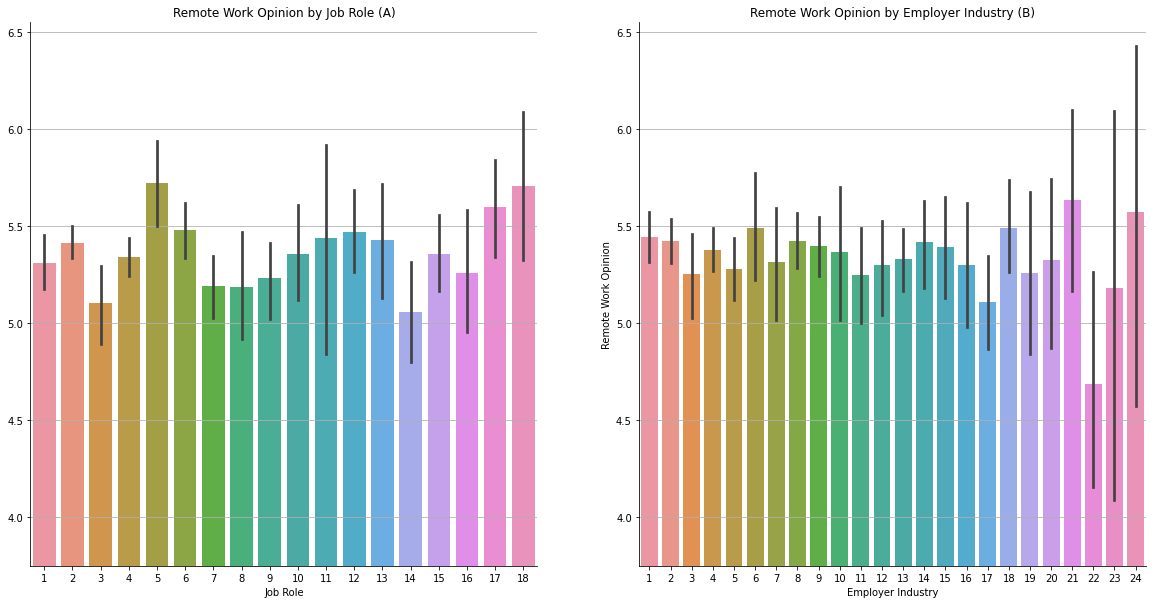

In [7]:
remote_work_industry_df = results_df[['Employer_Industry', 'Remote_Work_Opinion']]
remote_work_industry_df.dropna()
remote_work_job_df = results_df[['Job_Role', 'Remote_Work_Opinion']]
remote_work_job_df.dropna()

plt.figure (figsize = (20, 10))
g2 = plt.subplot(1, 2, 1)
sns.barplot(data = remote_work_job_df, x = 'Job_Role', y = 'Remote_Work_Opinion')
plt.title('Remote Work Opinion by Job Role (A)')
plt.ylim([3.75 , 6.55])
plt.grid(axis = 'y')
# remove original xticks labels and create a custom scale (prevents the cluster of info)
g2.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
# remove ylabel to prevent doubling the information
plt.ylabel('')
plt.xlabel('Job Role')

g3 = plt.subplot(1, 2, 2)
sns.barplot(data = remote_work_industry_df, x = 'Employer_Industry', y = 'Remote_Work_Opinion')
plt.title('Remote Work Opinion by Employer Industry (B)')
plt.grid(axis = 'y')
plt.ylim([3.75 , 6.55])
# remove original xticks labels and create a custom to explain in text
g3.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
plt.xlabel('Employer Industry')
plt.ylabel('Remote Work Opinion')
# clear top and right side of graph
sns.despine()

Now, we this new pair of graphs, we can now observe that:

- <u>In the graph A</u>, displayed on the left side, we can observe there's a overall approval for remote work. We can also observe that the position of of Mobile Apps Developer And SysAdmin Engineer (positions 5 and 18 respectively) register the highest mean value, while the position of Product Owner and CTO  (positions 3 and 14, respectively) has the lowest mean value;
- <u>In the graph B</u>, displayed on the right side, we can observe that the Travel industry (position 21) registers the highest mean value while the Research – Academic or Scientific Industry (position 22) registers the lowest mean value; additionally we can observe that The industries of Real Estate and Nonprofit (positions 23 and 24) have a wide difference between the highest and lowest registered in the industry (represented by the error line in each bar).

This comparison allows now to obtain a new set of conclusions:
- Despite the good ratings of Remote Work opinion by job, there’s a wider range of answers when analysed the ratings of Remote Work by Industry. This disparity may due to the fact that some industries are more reliable on face-to-face interaction or they need specialized equipment not available at home; 
- Additionally, the industries with the highest disparity of answers are also the ones that have registered the lowest number of answers, so caution is needed when analysing this categories.

# C) What are the most common languages by each job role? And what Framework?

Once again, at the Landing.Jobs report, slides 22 to 24, we are presented with various graphs explaining the distribution of people across Job Roles, Languages and Frameworks. While this allows to see which ones are the most represented and important for the industry, we don't have any graph crossing this information.
Therefore, one good way to cross this information and to show possible specializations, is to use heatmaps. And, since we are handling with two distinct variables, it's better to create two distinct heatmaps: one crossing job roles and languages; and another crossing job roles and frameworks.

Text(0.5, 1.0, 'Most Common Languages by Job Role')

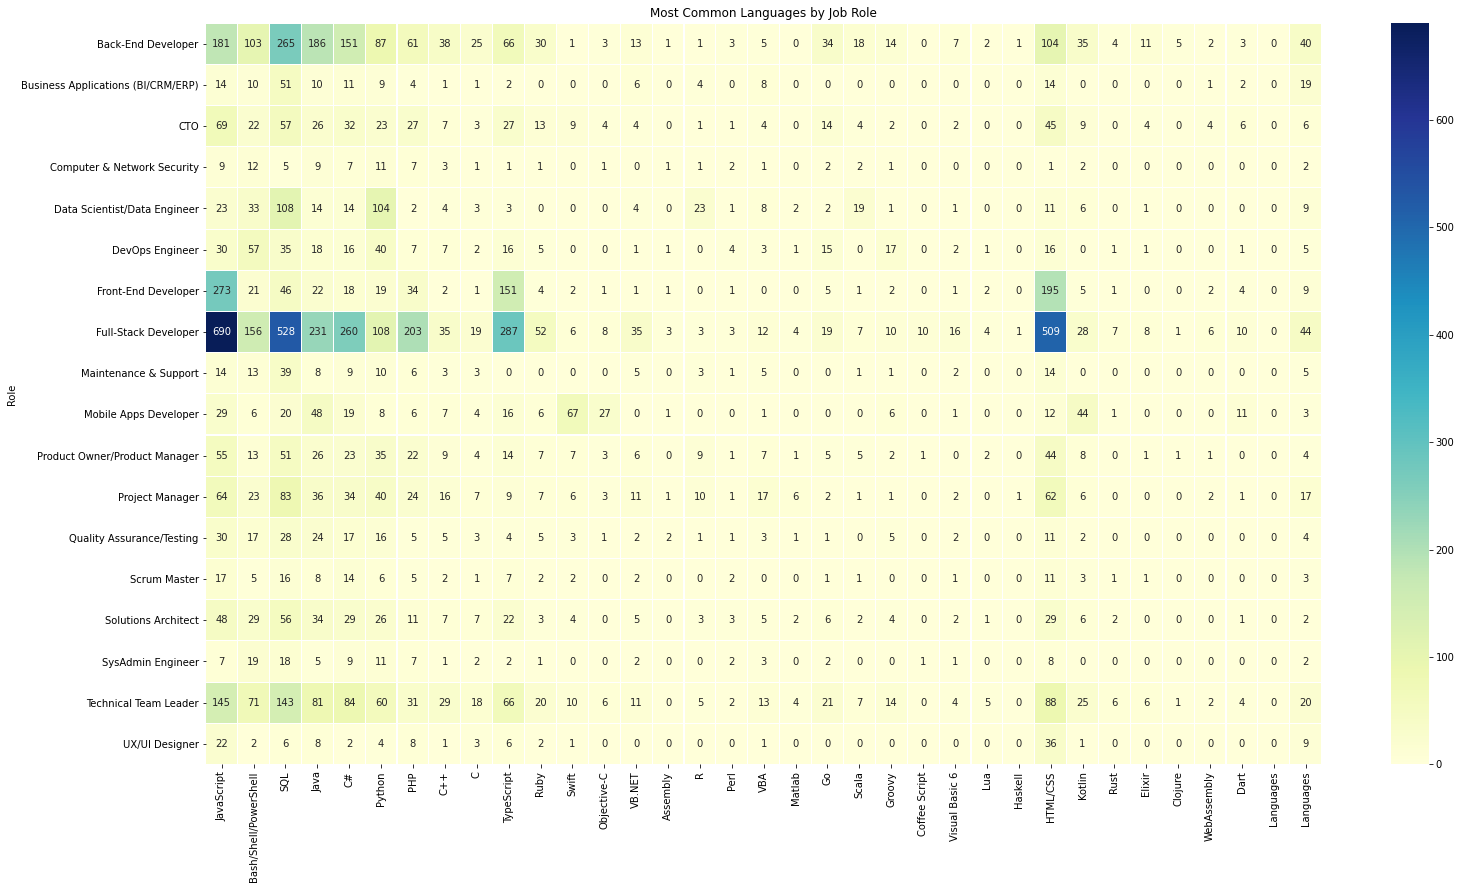

In [8]:
all_columns_names = results_df.columns.values.tolist()

job_languages = []
job_languages.append('Job_Role')

for name in all_columns_names:
    if 'Language' in name:
        job_languages.append(name)

col_names = []
for name in job_languages:
    temp1 = name.split('_')
    col_names.append(temp1[1])

job_languages_df = results_df[job_languages] #retrieve necessary data
job_languages_df.columns = col_names #change column names

job_languages_df = job_languages_df.groupby('Role').count().reset_index()
job_languages_df = job_languages_df.set_index(['Role']) #turns column ROLE to be INDEX

# heatmap for Languages by Job Role
plt.figure(figsize = (25, 30))
g2 = plt.subplot(2, 1, 1)
sns.heatmap(job_languages_df, 
            annot = True, #write the absolute frequency in each square
            fmt = 'd', #String formatting when ANNOT present 
            linewidths = 0.1, 
            cmap="YlGnBu") #change color pallete
plt.title('Most Common Languages by Job Role')

Text(0.5, 1.0, 'Most Common Frameworks by Job Role')

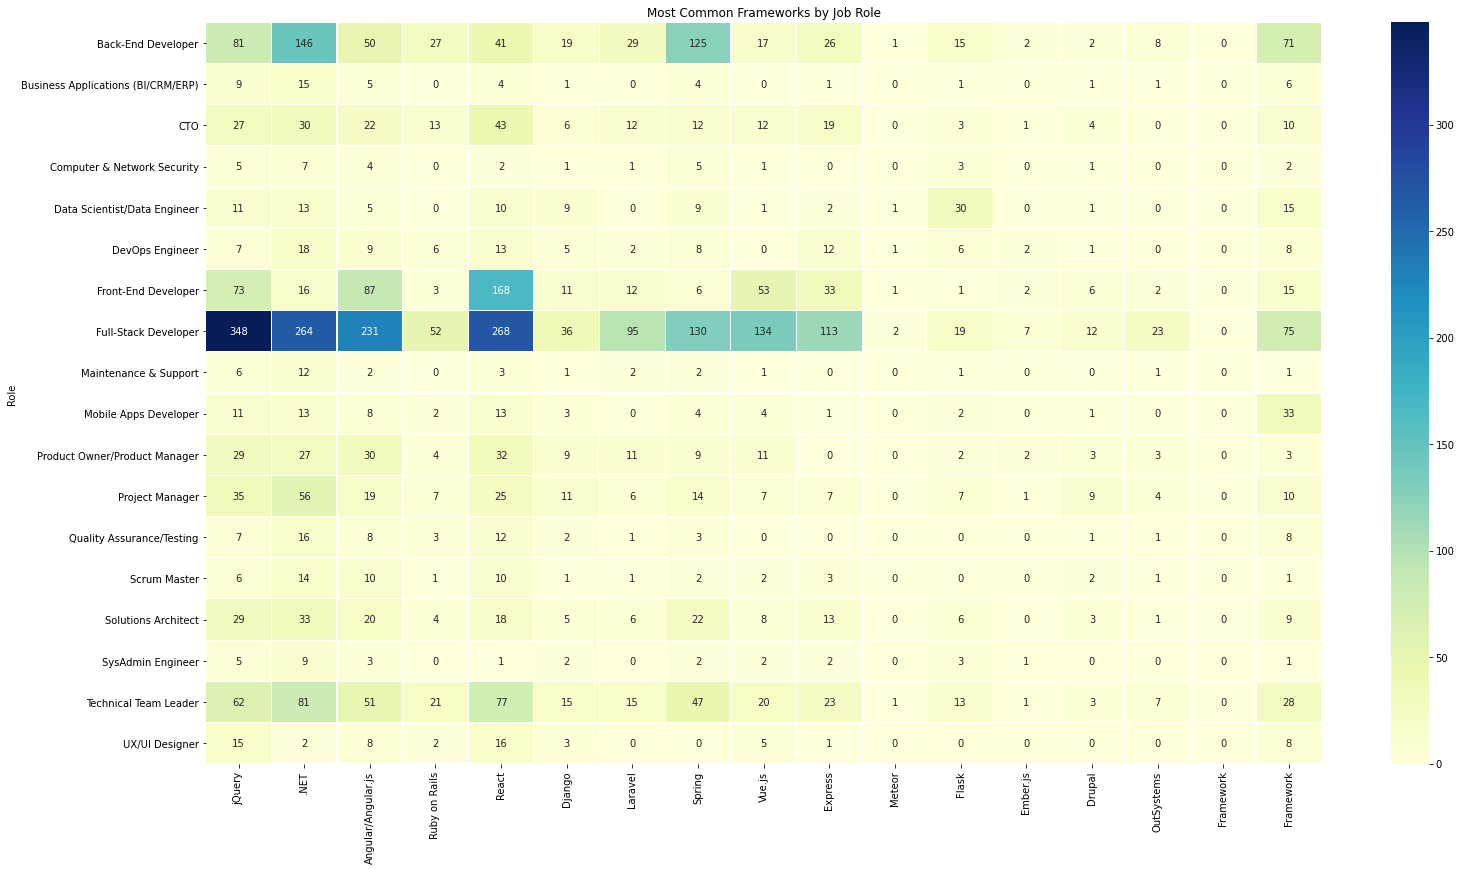

In [9]:
job_framework = []
job_framework.append('Job_Role')

for name in all_columns_names:
    if 'Framework' in name:
        job_framework.append(name)

col_names2 = []
for name in job_framework:
    temp2 = name.split('_')
    col_names2.append(temp2[1])

job_framework_df = results_df[job_framework] #retrieve necessary data
job_framework_df.columns = col_names2 #change name of columns

job_framework_df = job_framework_df.groupby('Role').count().reset_index()
job_framework_df = job_framework_df.set_index(['Role']) #turns column ROLE to be INDEX

plt.figure(figsize = (25, 30))
g3 = plt.subplot(2, 1, 2)
sns.heatmap(job_framework_df, 
            annot = True, #write the absolute frequency in each square
            fmt = 'd', #String formatting when ANNOT present 
            linewidths = 0.1, 
            cmap="YlGnBu") #change color pallete
plt.title('Most Common Frameworks by Job Role')

When analysing both heatmaps, we can observe that:

- When crossing job roles and languages, we can observe that each job as a specific set of languages;

- When crossing job roloes and frameworks, we can also observe the necessity to know a specific set of languages. However, we can observe that each job has a wider range of knowledge than observed in terms of languages.

This, in turn, allows us to extrapolate that while each job has a specific group of languages to perform their daily duties, the wide range of projects probably needs them to learn a great variety of frameworks. 
However, remarks must be made that the job roles of Full-Stack Developer and Back-End Developer where those with the highest rate of answers, so other job roles need to be analysed with a certain degree of uncertainty.

# 4. Project Conclusions

In this project, provided by the TAIKAI.NETWORK platform and Landing.Jobs, we were challenged to look at the report made originally by Landing.Jobs and then provide new insights from the data made available by them. With that challenge in mind, I decided to pursue new analyses that could help current and future workers on the IT Industry to better understand some key aspects in their daily jobs, namely:

A) Despite the overall male dominance of the field, the median age is slightly over 30 years across genders, which shows that the industry is still fairly young in Portugal;

B) While there's a fairly good opinion to do remote work, by the employees, the level of opinion is dependent on the Industry you are in (due to the fact that some industries depend on heavily specialized eqquipment and/or face-to-face interactions to better perform their daily duties);

C) Despite the fact that you need to learn a specific group of languages in order to enter in a certain job role, in terms of Frameworks, there more you know, the better. Nevertheless, always keep learning in order to continue on par with the development of the IT Industry.



Thank you for your time reading this exercise, and if you have any question or feedback, feel free to contact me through GITHUB or TIKAI Platform.

Have a nice day!

- João